# L3-D - Linear Quantization II: Per Group Quantization

In this lesson, you will continue to learn about different granularities of performing linear quantization. You will cover `per group` in this notebook.

Run the next cell to import all of the functions you have used before in the previous lesson(s) of `Linear Quantization II` to follow along with the video.

- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

In [1]:
import torch

from helper import linear_q_symmetric_per_channel, get_q_scale_symmetric, linear_dequantization
from helper import plot_quantization_errors, quantization_error

## Different Granularities for Quantization
- For simplicity, you'll perform these using Symmetric mode.

### Per Group
- For simplicity, you'll quantize a 2D tensor along the rows.

In [2]:
def linear_q_symmetric_per_group(tensor, group_size,
                                 dtype=torch.int8):
    
    t_shape = tensor.shape
    assert t_shape[1] % group_size == 0
    assert tensor.dim() == 2
    
    tensor = tensor.view(-1, group_size)
    
    quantized_tensor, scale = linear_q_symmetric_per_channel(
                                tensor, dim=0, dtype=dtype)
    
    quantized_tensor = quantized_tensor.view(t_shape)
    
    return quantized_tensor, scale

In [3]:
def linear_dequantization_per_group(quantized_tensor, scale, 
                                    group_size):
    
    q_shape = quantized_tensor.shape
    quantized_tensor = quantized_tensor.view(-1, group_size)
    
    dequantized_tensor = linear_dequantization(quantized_tensor, 
                                               scale, 0)
    
    dequantized_tensor = dequantized_tensor.view(q_shape)
    
    return dequantized_tensor

In [4]:
test_tensor = torch.rand((6, 6))

**Note:** Since the values are random, what you see in the video might be different than what you will get.

In [5]:
group_size = 3

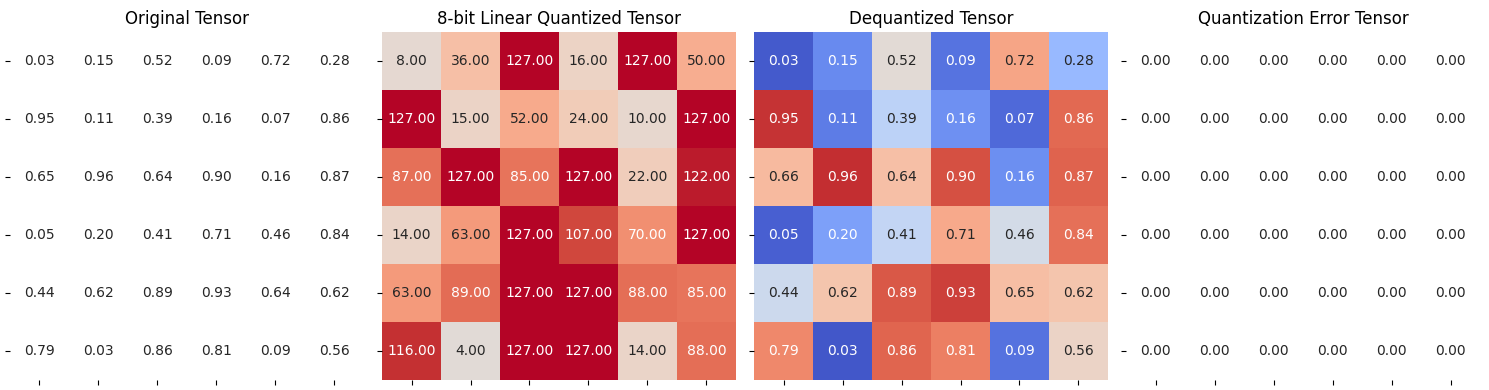

In [6]:
quantized_tensor, scale = linear_q_symmetric_per_group(
    test_tensor, group_size=group_size)

dequantized_tensor = linear_dequantization_per_group(
    quantized_tensor, scale, group_size=group_size)

plot_quantization_errors(
    test_tensor, quantized_tensor, dequantized_tensor)

In [7]:
print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor)}""")

Quantization Error : 2.060101223833044e-06
